<a href="https://colab.research.google.com/github/Yassinebo54/ML/blob/main/GUC_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC NETW 1003 Kmeans Assginmnet

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function

import required libraries

In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function

write a function to calculate the distance between a set of cluster centroids and all the data points

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type)
* The function shoud be able to handel data points with any number of features and any number of points
* The function should be able to handle any K number of cluster centroids
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two
    - Ecluidian distance
    - Pearson correlation distance
  

In [ ]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):

    K = Cluster_Centroids.shape[0]
    N = Data_points.shape[0]
    Cluster_Distance = np.zeros((N, K))

    # Calculate distances based on distance type
    if Distance_Type == 'Euclidean':
        for i in range(K):
            centroid = Cluster_Centroids[i]
            Cluster_Distance[:, i] = np.linalg.norm(Data_points - centroid, axis=1)
    elif Distance_Type == 'Pearson':
        for i in range(K):
            centroid = Cluster_Centroids[i]
            centroid_mean = np.mean(centroid)
            centroid_std = np.std(centroid)
            for j in range(N):
                data_point = Data_points[j]
                data_mean = np.mean(data_point)
                data_std = np.std(data_point)
                pearson_corr = np.sum((centroid - centroid_mean) * (data_point - data_mean)) / (K * centroid_std * data_std)
                Cluster_Distance[j, i] = 1 - pearson_corr

    return Cluster_Distance


> ### 1.2. Code for K means function

> Loop until a stopping condition

> > in the loop do the following
> > 1. Cluster Assginmnet
> > > * Use the GUC_Distance to calculate between each cluster head and all the points
> > > * Find the value and index of the minimum distance  for each row.
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center)

In [ ]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):

    # Initialize cluster centroids
    max = 10
    data_ranges = np.ptp(Data_points, axis=0)  # Calculate data ranges for each column
    cluster_centroids = np.random.rand(Number_of_Clusters, Data_points.shape[1]) * data_ranges
    for i in range(max):
        # Cluster Assignment
        cluster_distance = GUC_Distance(cluster_centroids, Data_points, Distance_Type)
        cluster_assignment = np.argmin(cluster_distance, axis=1)

        # Calculate mean square distance for each cluster
        mean_square_distances = np.zeros(Number_of_Clusters)
        for i in range(Number_of_Clusters):
            points_in_cluster = Data_points[cluster_assignment == i]
            centroid = cluster_centroids[i]
            mean_square_distances[i] = np.mean(np.linalg.norm(points_in_cluster - centroid, axis=1) ** 2)

        # Stopping condition
        previous_mean_square_distances = np.sum(mean_square_distances)
        if np.sum(mean_square_distances) >= previous_mean_square_distances:
            break

        # Update Centroids
        for i in range(Number_of_Clusters):
            points_in_cluster = Data_points[cluster_assignment == i]
            if len(points_in_cluster) > 0:
                cluster_centroids[i] = np.mean(points_in_cluster, axis=0)

    Final_Cluster_Distance = GUC_Distance(cluster_centroids, Data_points, Distance_Type)
    Cluster_Metric = np.sum(mean_square_distances)

    return [ Final_Cluster_Distance , Cluster_Metric ]

## 2. Display Results

* below is a an example fuction that displayes Clusters in 2D

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures

* The function is a helper function that is originaly be found in
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:

# Define the display_cluster function
def display_cluster(X, km={}, num_clusters=0, ax=None):
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']  # List of colors
    alpha = 0.5  # Color opacity
    s = 20  # Size of points

    # If no clustering results provided, scatter plot all data points with a single color
    if not km:
        ax.scatter(X[:, 0], X[:, 1], c=colors[0], alpha=alpha, s=s)
    else:
        # Scatter plot each cluster with a different color
        for i in range(num_clusters):
            ax.scatter(X[km['labels_'] == i, 0], X[km['labels_'] == i, 1],
                       c=colors[i % len(colors)], alpha=alpha, s=s)
            # Scatter plot cluster centers with an 'x' marker
            ax.scatter(km['cluster_centers_'][i][0], km['cluster_centers_'][i][1],
                       c=colors[i % len(colors)], marker='x', s=100)



> #### 2.2. Example 1 : Circular Data Gen and display

* below is an example of how to use the funciton
  *  prepare the figure size and background
   > * this part can be replaced by a number of subplots
  
  * Produce a data set that represent the x and y o coordinates of a circle
   > * this part can be replaced by data that you import froma file
  
  * Data is displayed
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction

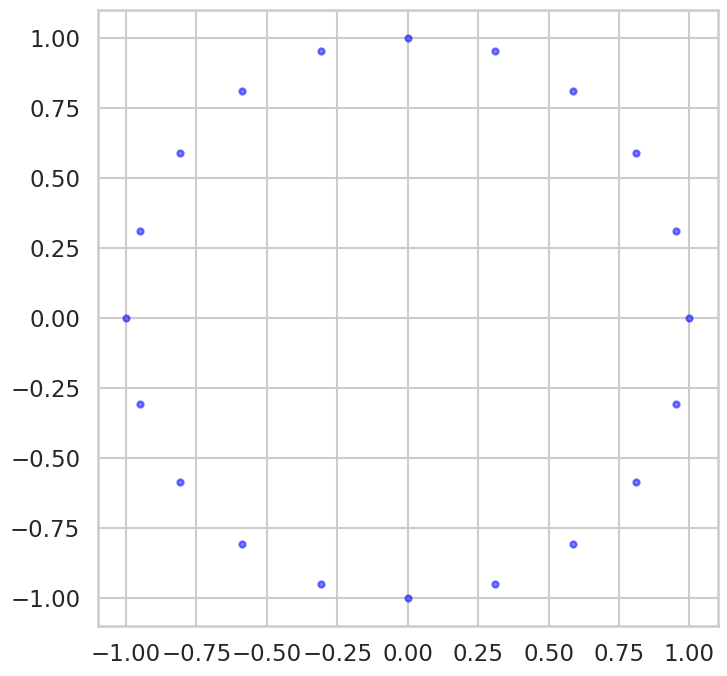

In [ ]:
# prepare the figure sise and background
# this part can be replaced by a number of subplots
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle
# this part can be replaced by data that you import froma file
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display

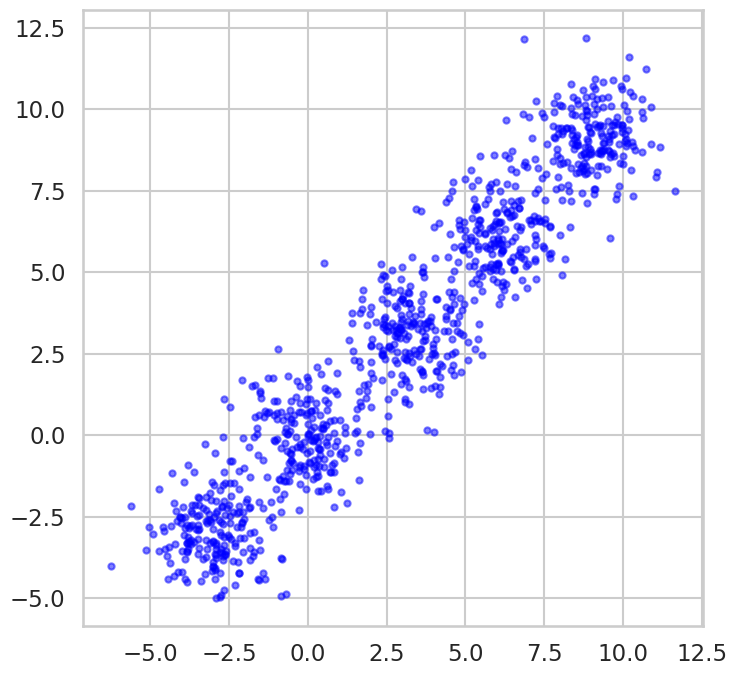

In [ ]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display

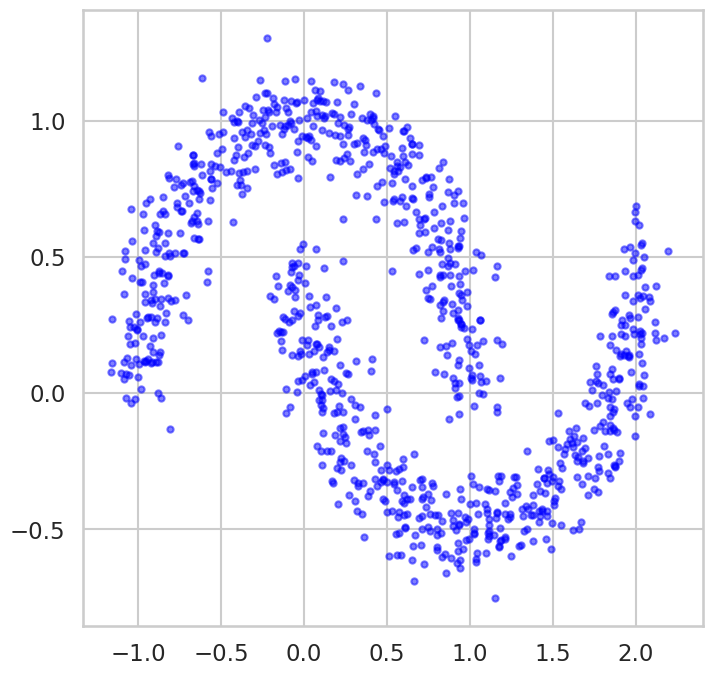

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)


## 3. Examples:


### Example 1:

### Eculidean:

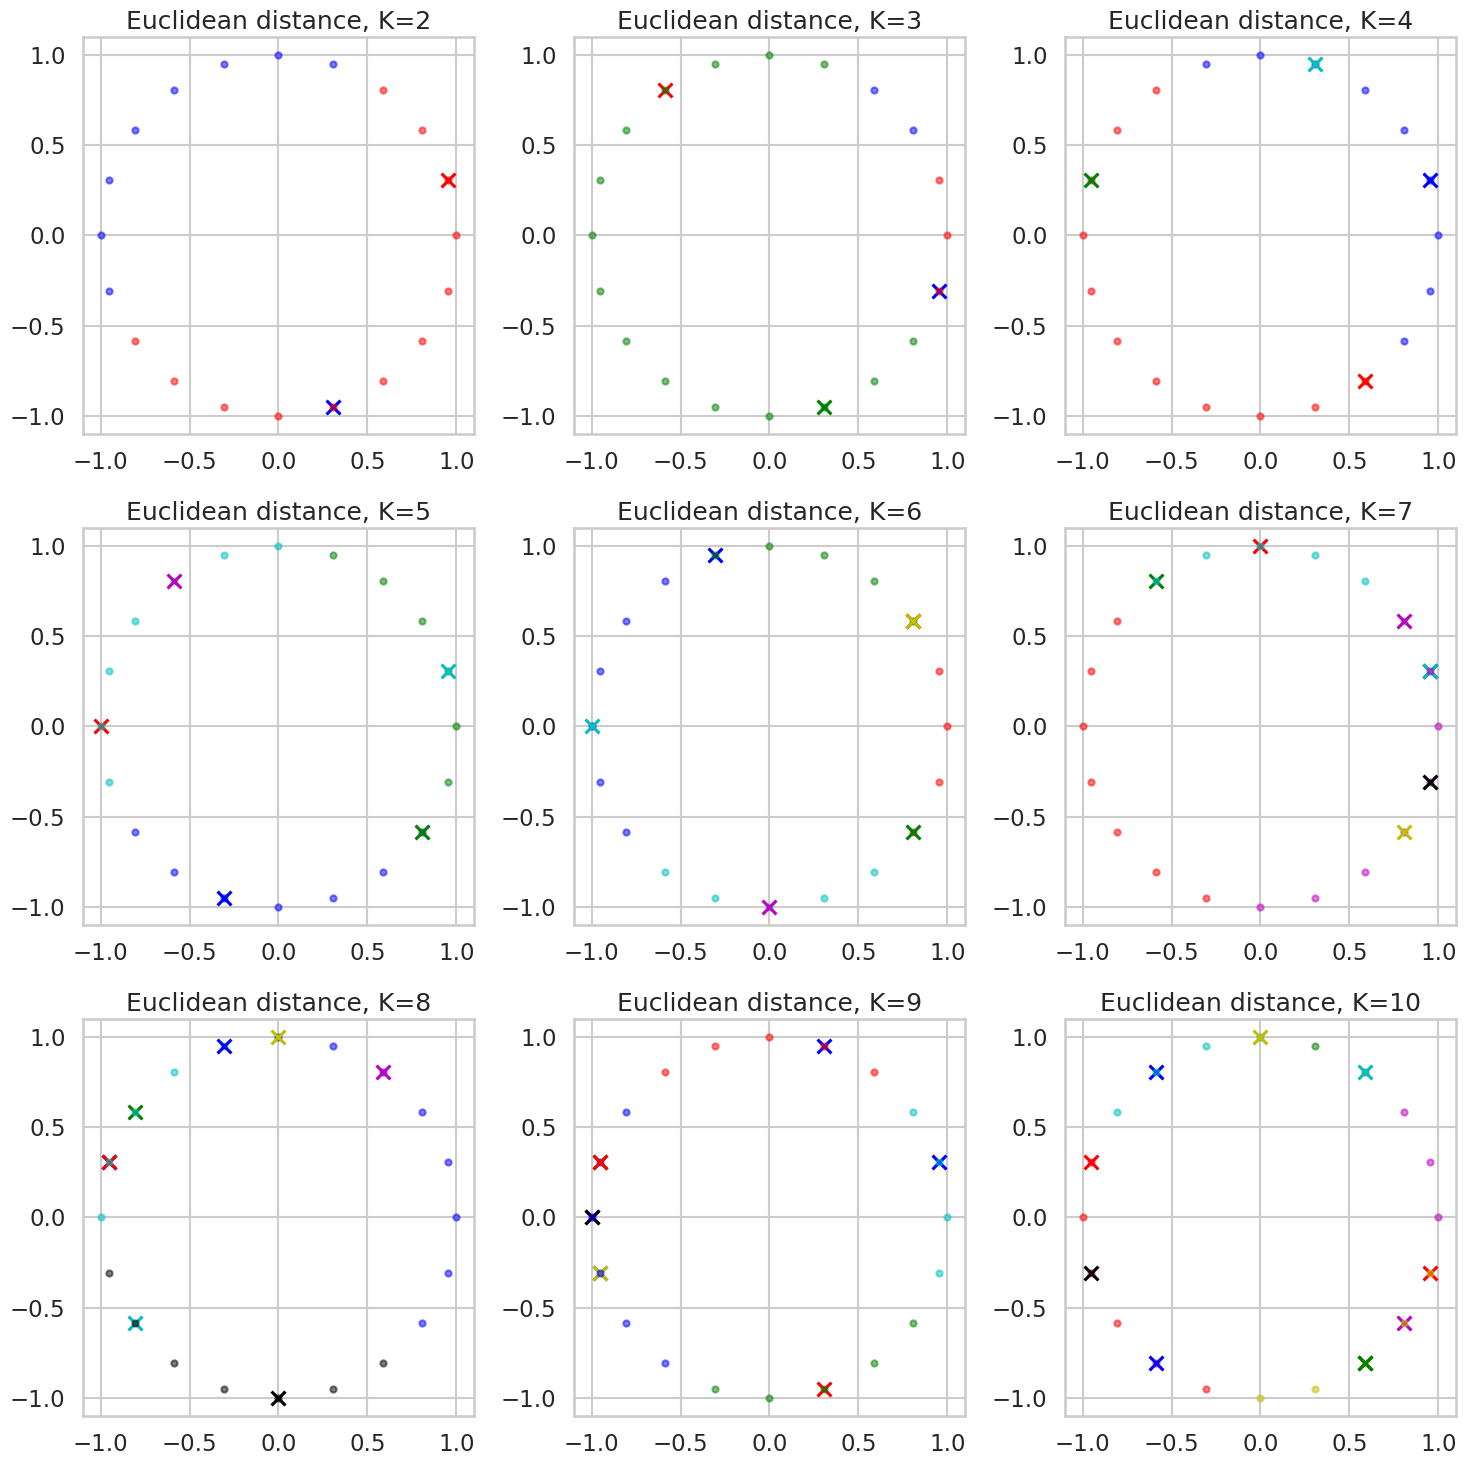

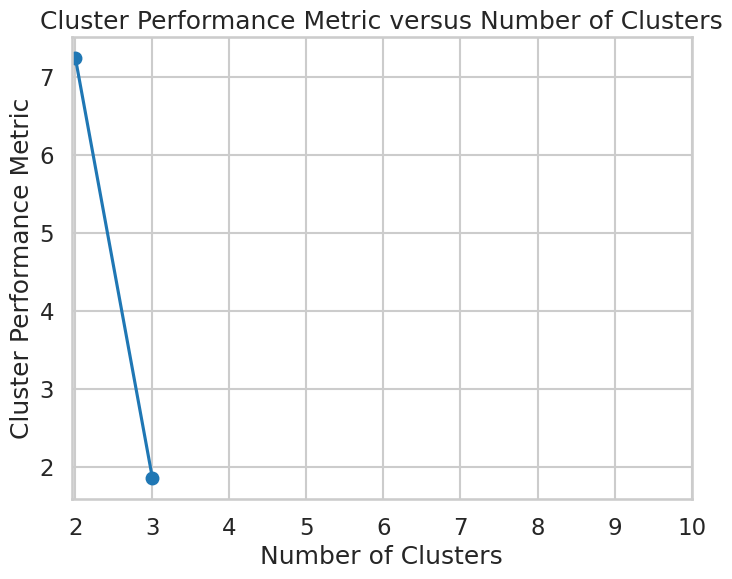

In [ ]:
cluster_range = range(2, 11)
max = 2000
# Initialize lists to store cluster performance metrics
cluster_metrics = []

# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, 'Euclidean')

    # Display clusters
    axes[row, col].set_title(f'Euclidean distance, K={num_clusters}')
    display_cluster(X, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                           'cluster_centers_': X[np.random.choice(X.shape[0], num_clusters)]},
                    num_clusters=num_clusters, ax=axes[row, col])
    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

### Pearson:

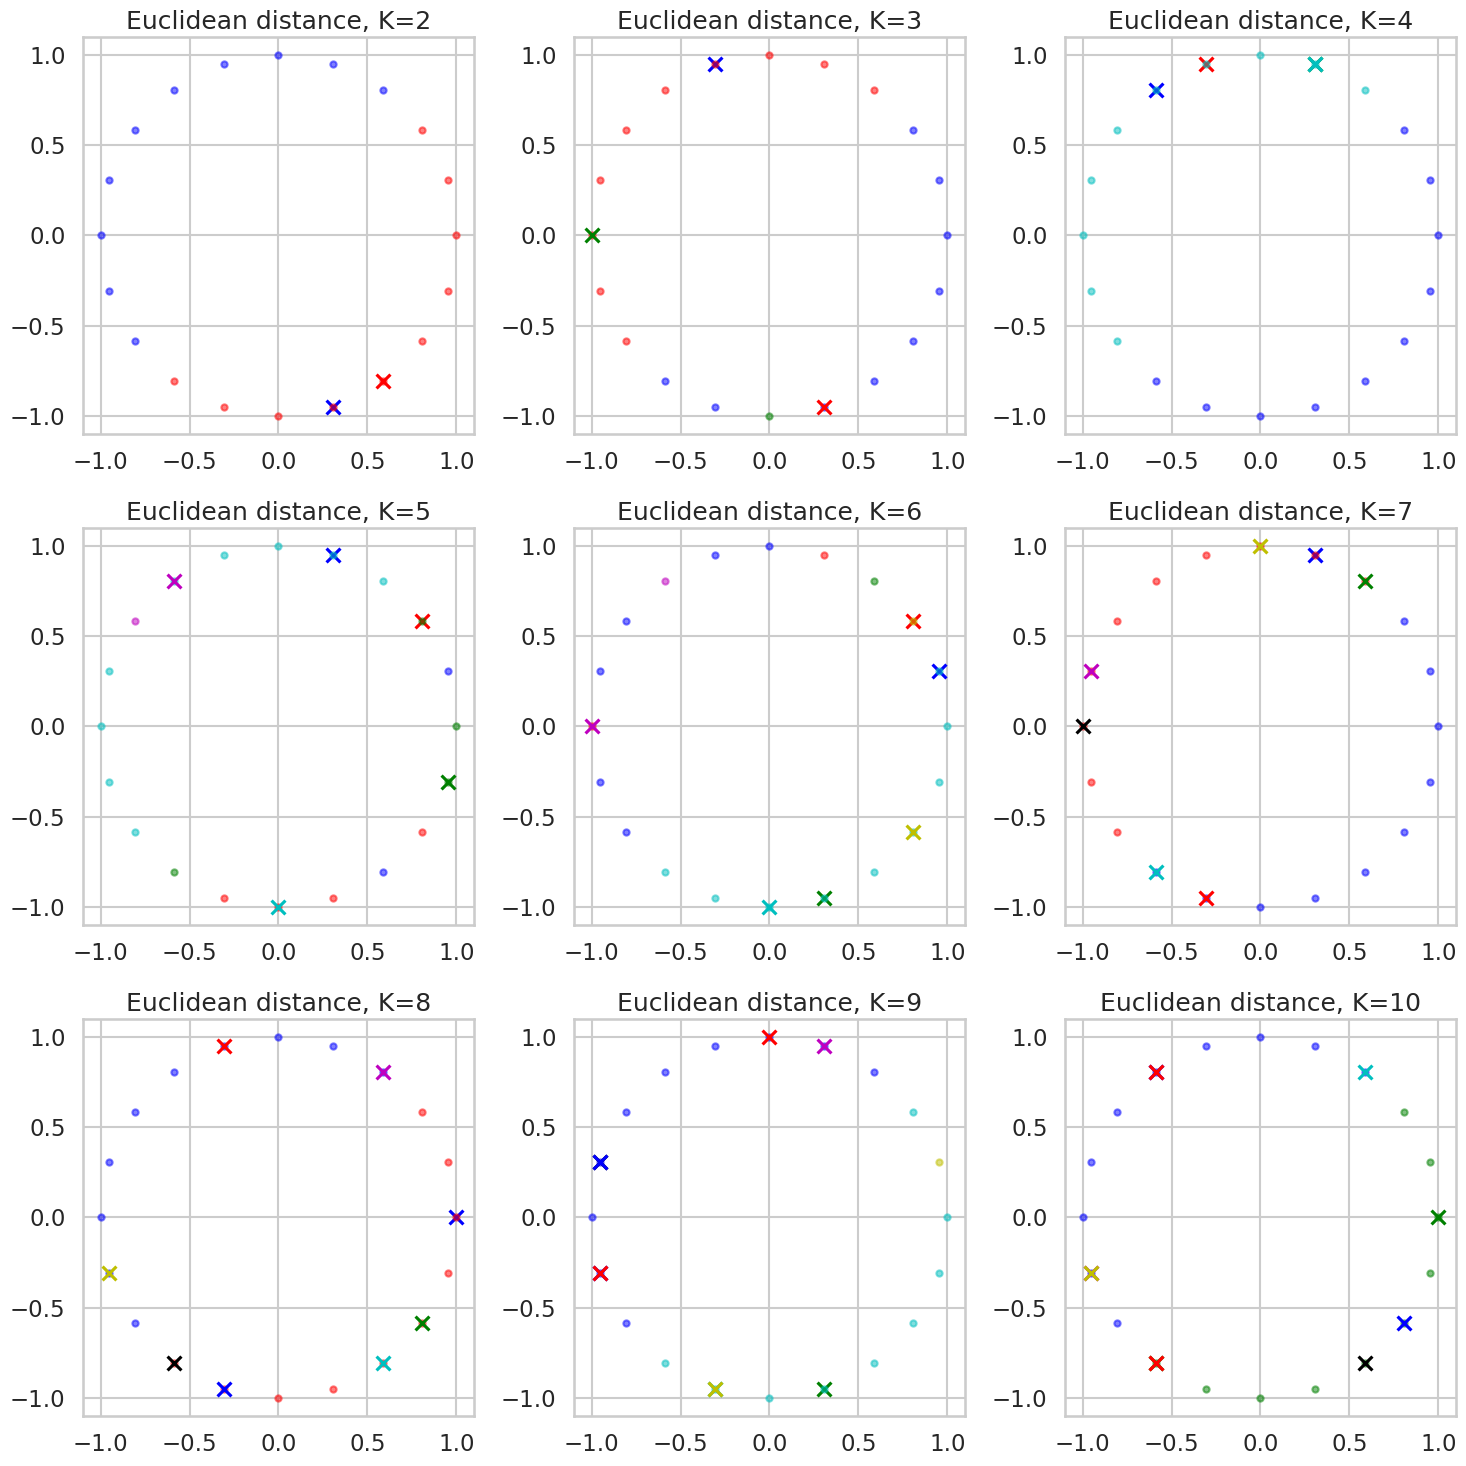

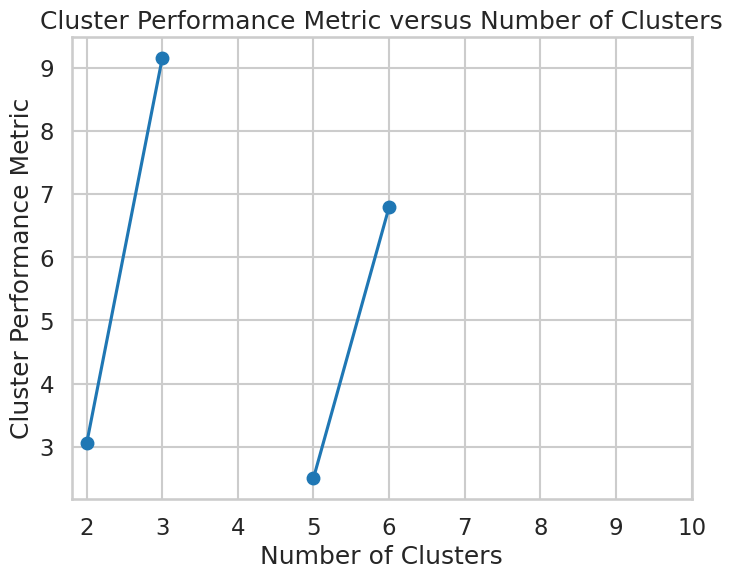

In [ ]:
cluster_range = range(2, 11)
max = 1000
# Initialize lists to store cluster performance metrics
cluster_metrics = []

# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, 'Pearson')

    # Display clusters
    axes[row, col].set_title(f'Euclidean distance, K={num_clusters}')
    display_cluster(X, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                           'cluster_centers_': X[np.random.choice(X.shape[0], num_clusters)]},
                    num_clusters=num_clusters, ax=axes[row, col])
    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

### Example 2:

### Euclidean:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


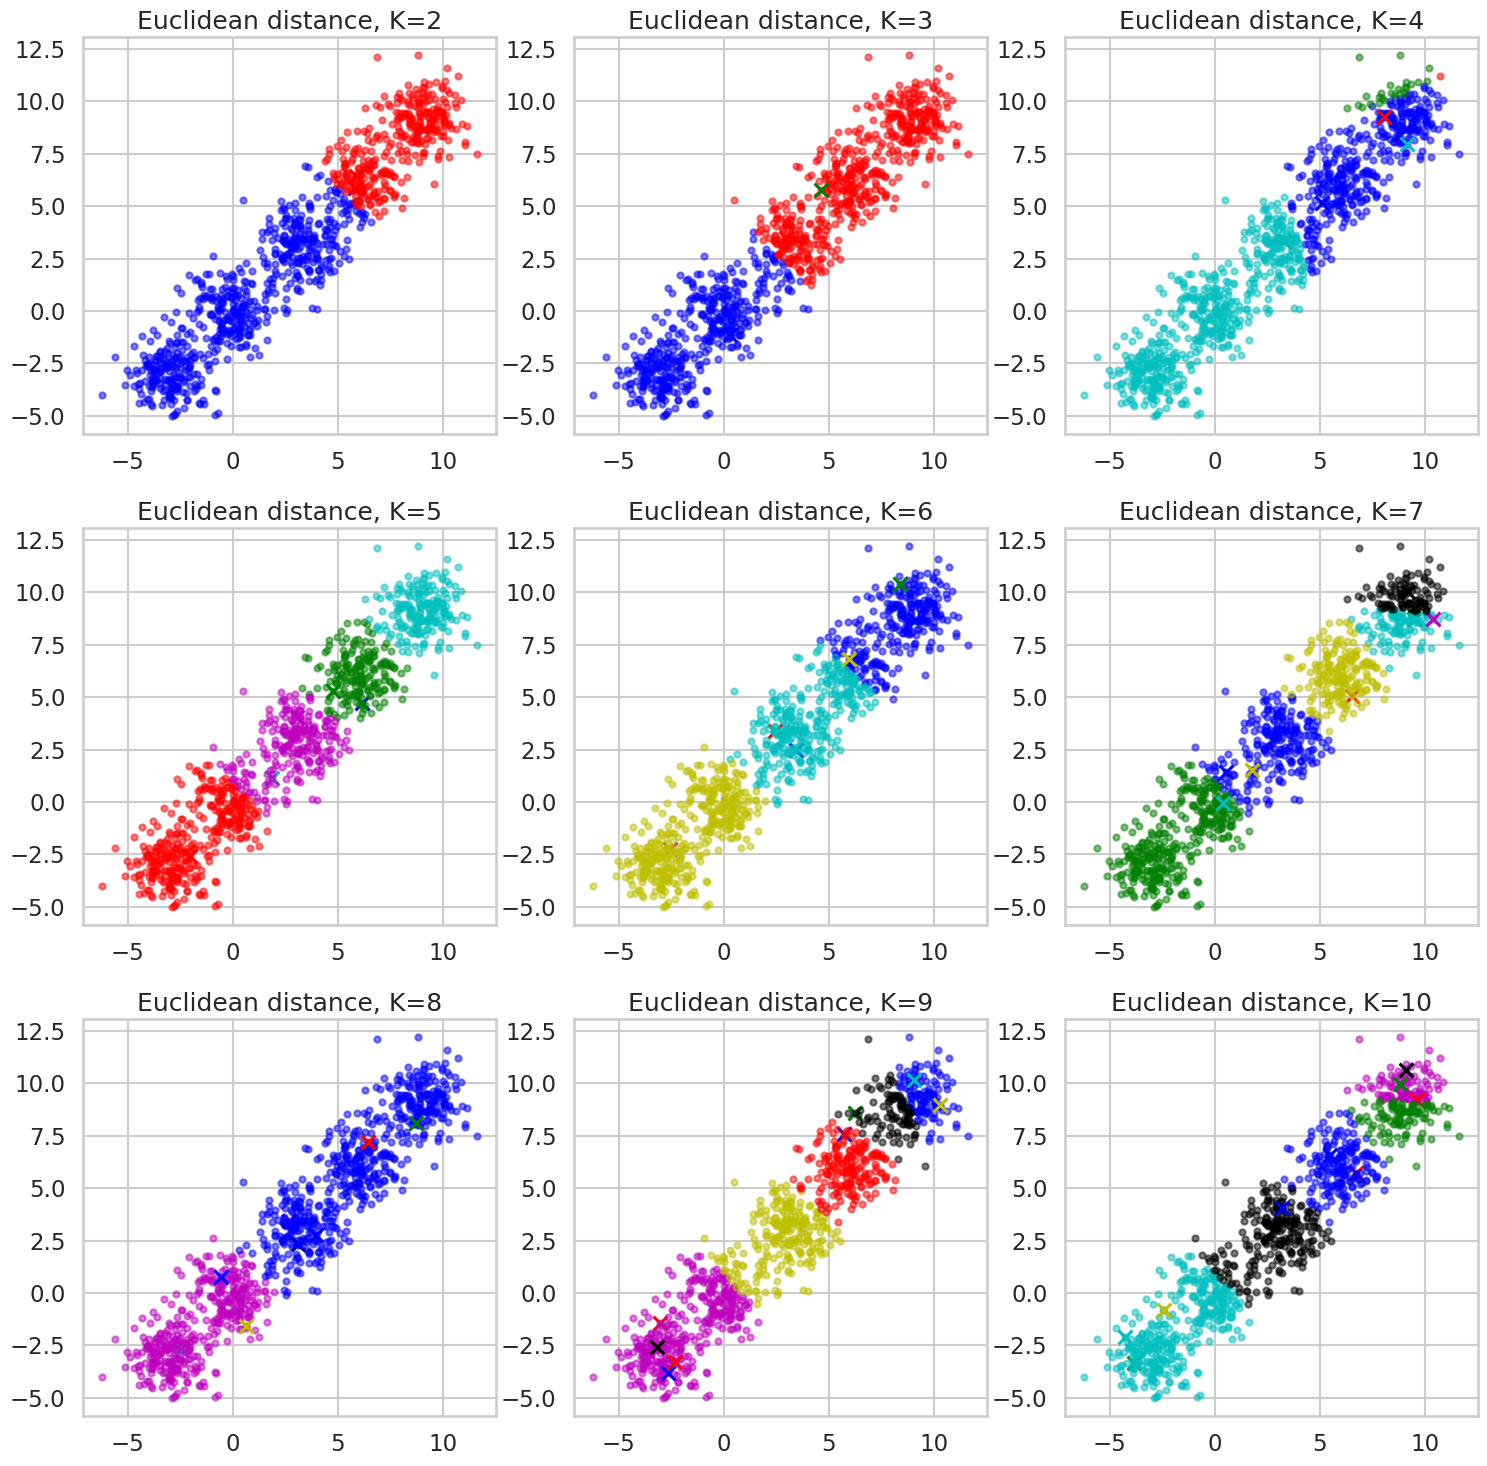

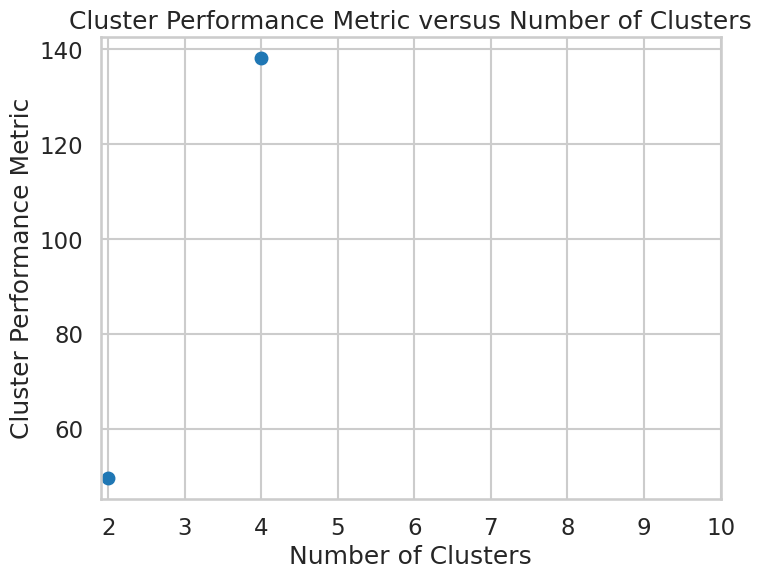

In [ ]:
cluster_range = range(2, 11)
#max = 2000
# Initialize lists to store cluster performance metrics
cluster_metrics = []

# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, 'Euclidean')

    # Display clusters
    axes[row, col].set_title(f'Euclidean distance, K={num_clusters}')
    display_cluster(X, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                           'cluster_centers_': X[np.random.choice(X.shape[0], num_clusters)]},
                    num_clusters=num_clusters, ax=axes[row, col])
    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [ ]:
print(cluster_metrics)

[49.670105465870435, nan, 138.18741854286472, nan, nan, nan, nan, nan, nan]


### Pearson:

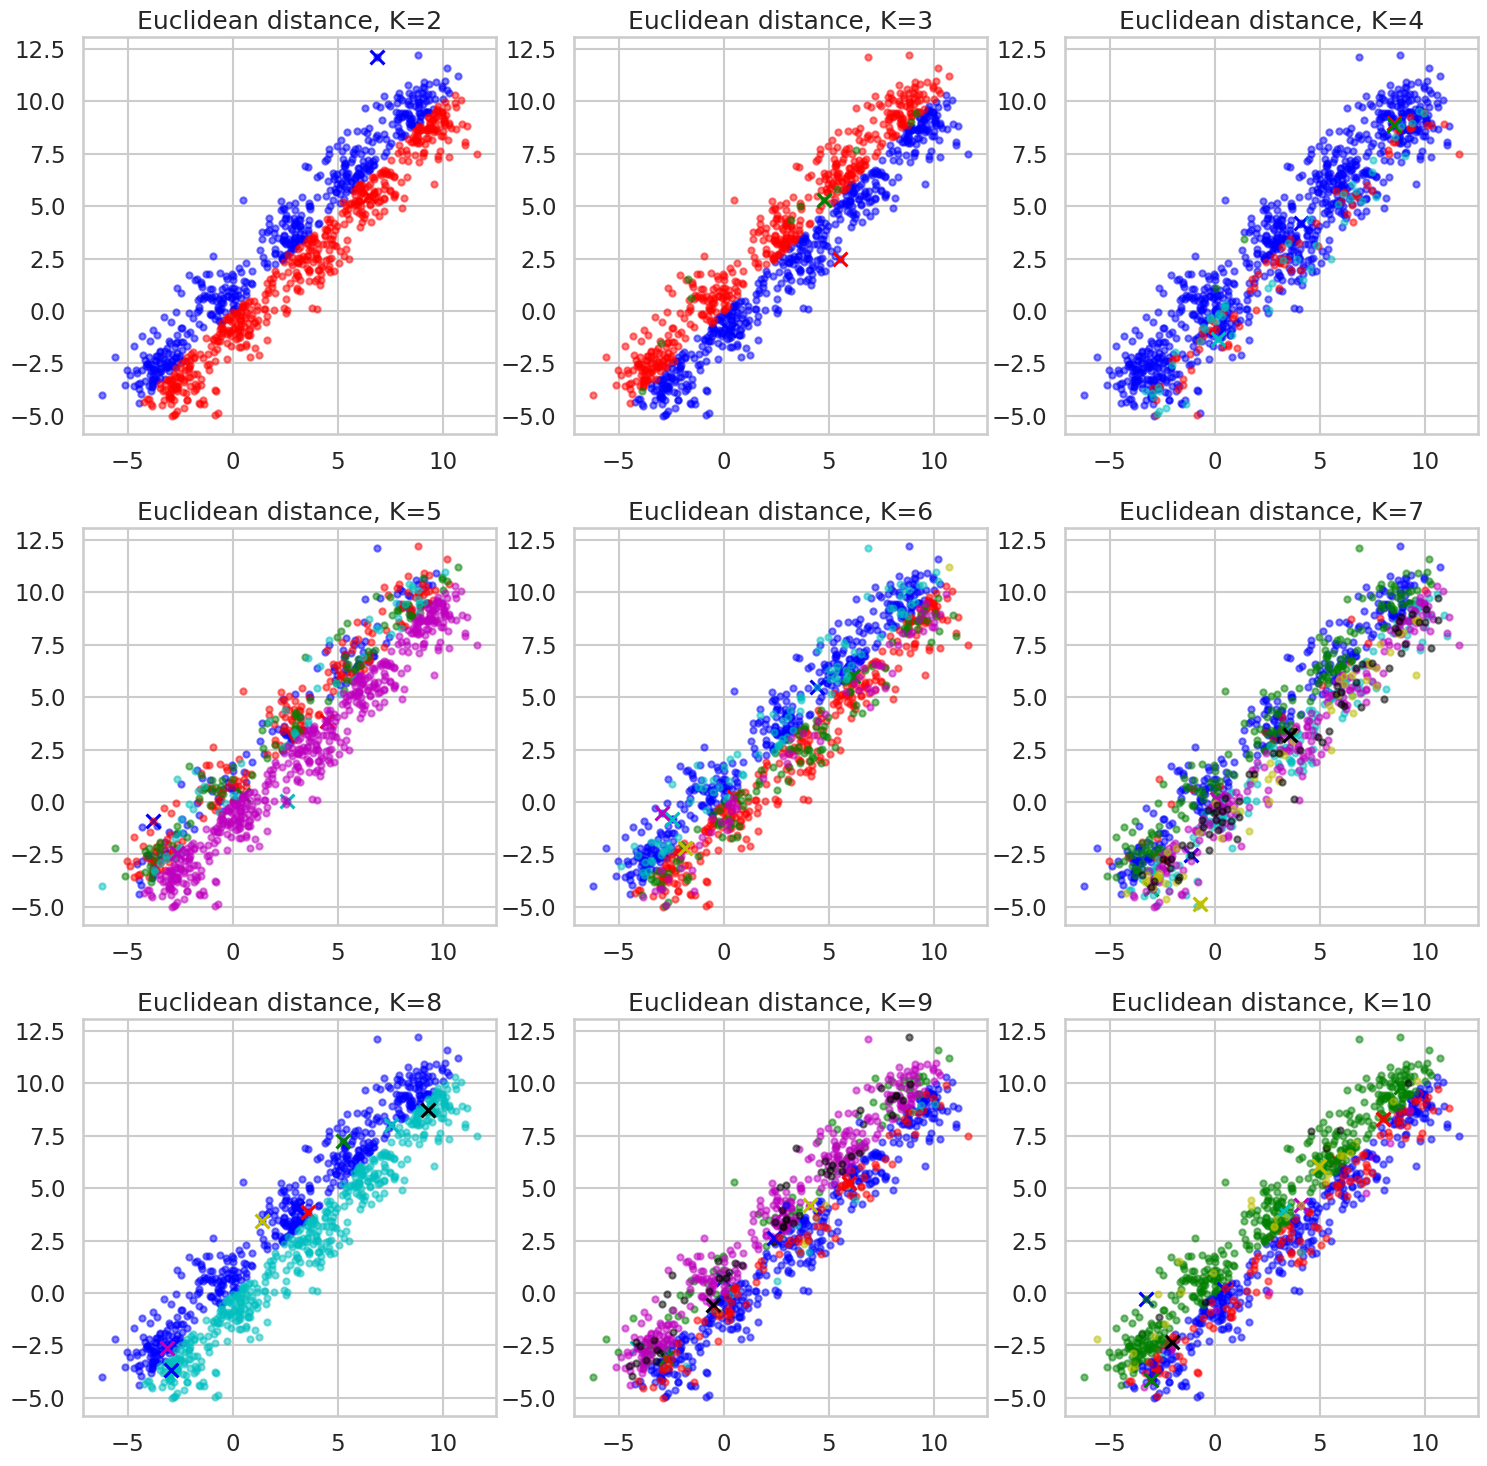

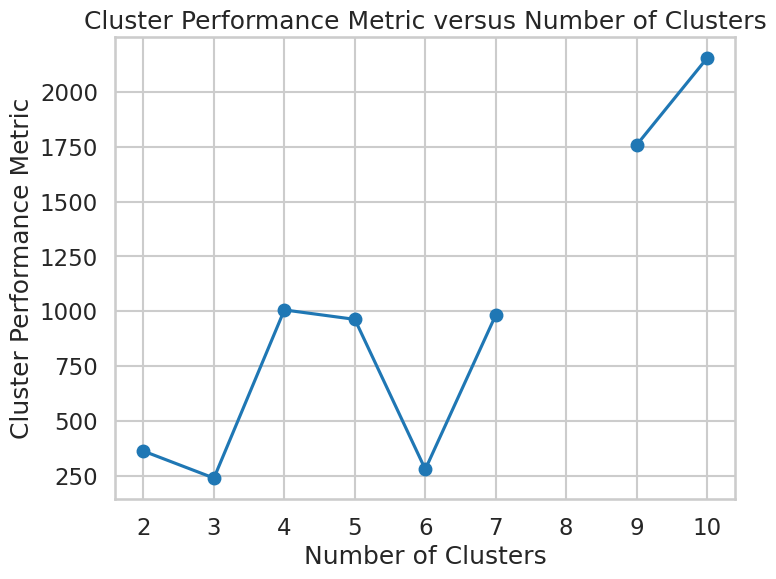

In [ ]:
cluster_range = range(2, 11)
#max = 2000
# Initialize lists to store cluster performance metrics
cluster_metrics = []

# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, 'Pearson')

    # Display clusters
    axes[row, col].set_title(f'Euclidean distance, K={num_clusters}')
    display_cluster(X, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                           'cluster_centers_': X[np.random.choice(X.shape[0], num_clusters)]},
                    num_clusters=num_clusters, ax=axes[row, col])
    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [ ]:
print(cluster_metrics)

[362.5218652948858, 239.54644053235054, 1005.9848483915782, 962.9536106328914, 279.5806243535299, 982.5897081782214, nan, 1757.852951250045, 2153.7674301789552]


### Example 3:

### Euclidean:

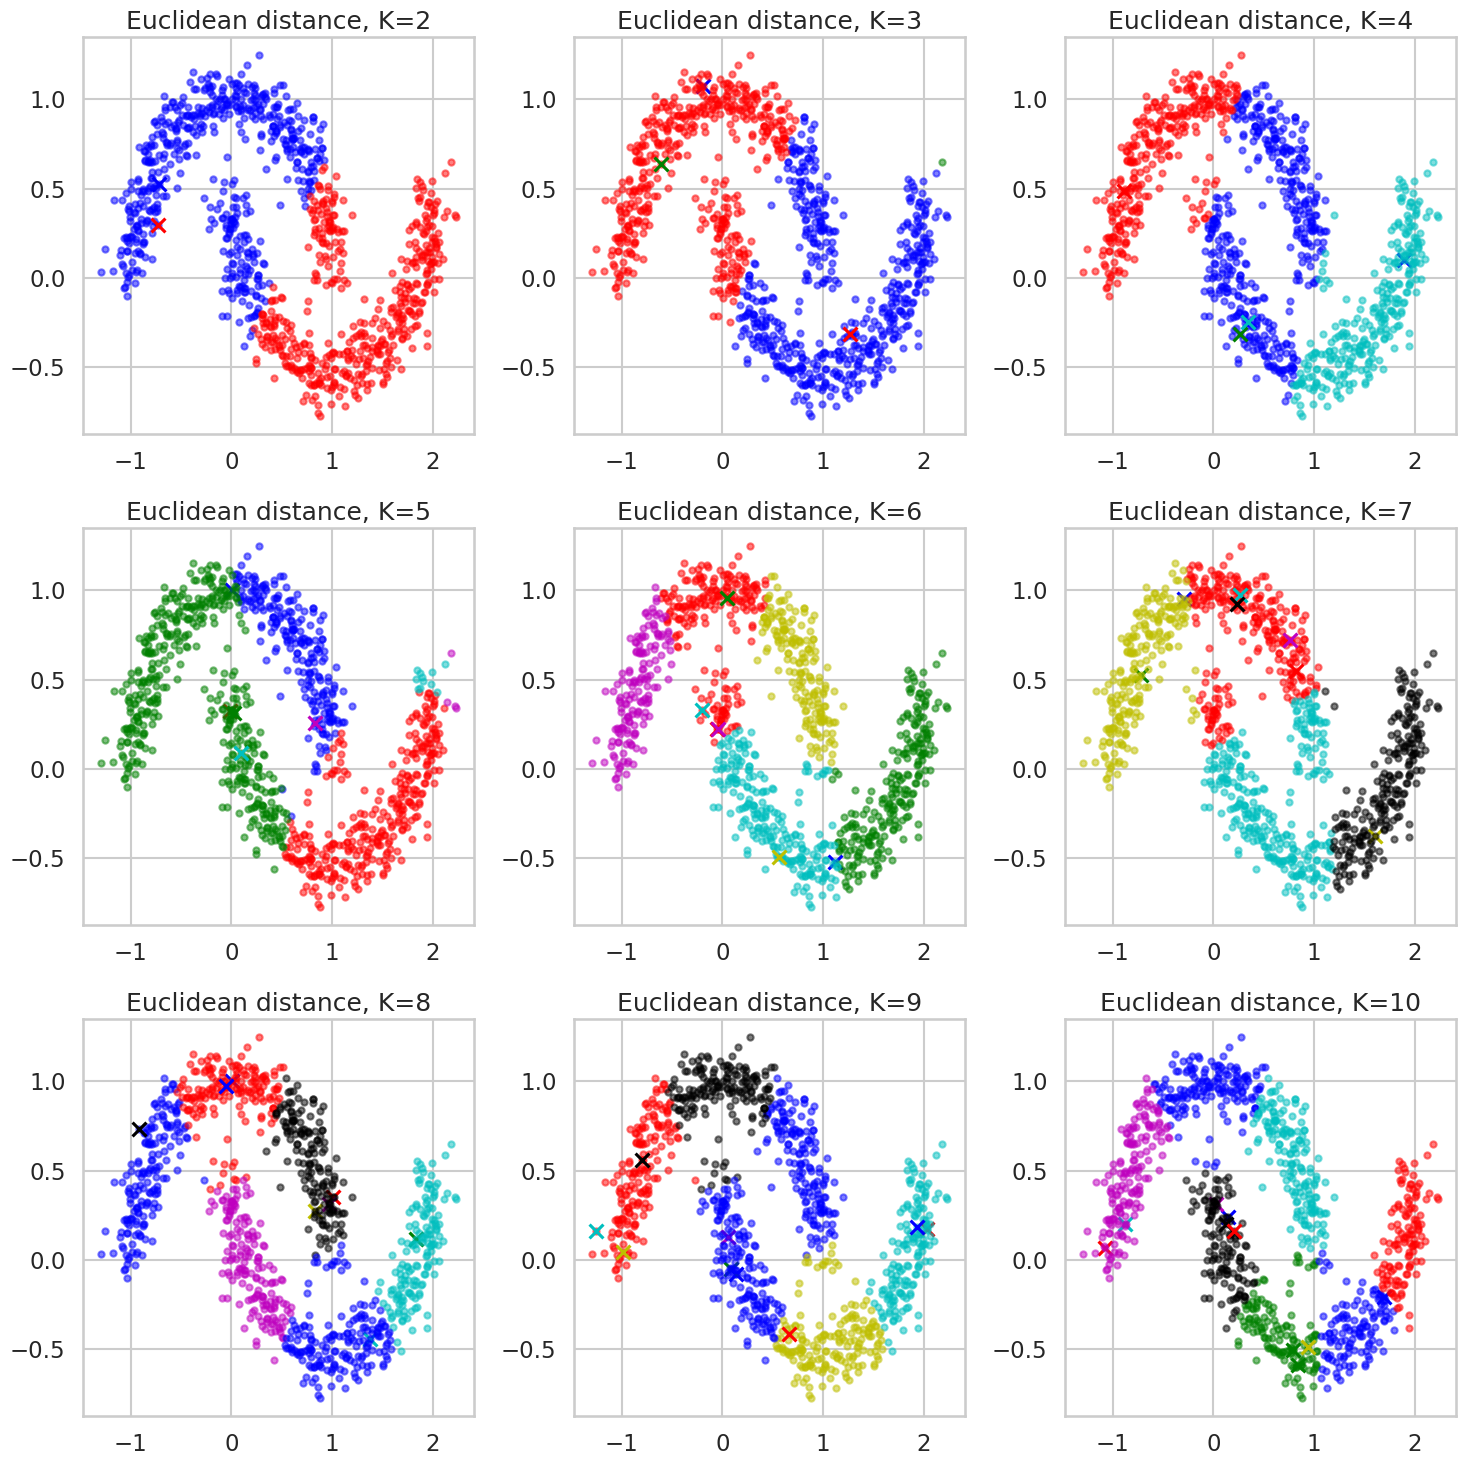

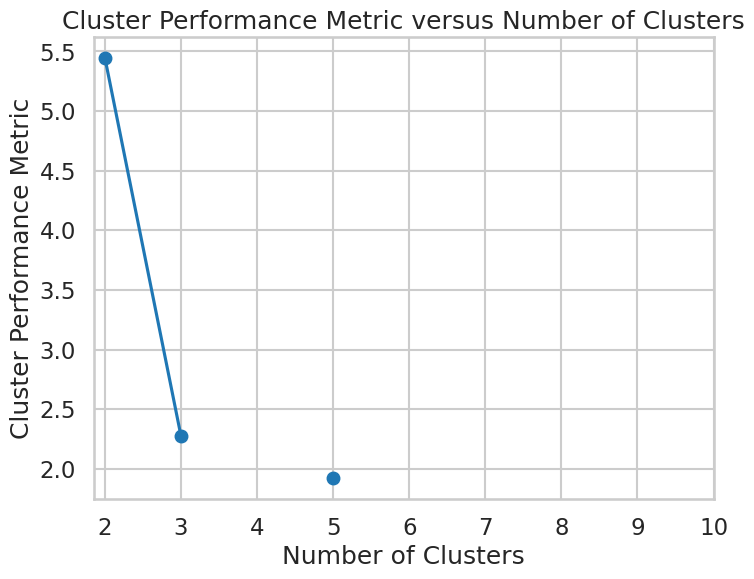

In [ ]:
cluster_range = range(2, 11)
#max = 2000
# Initialize lists to store cluster performance metrics
cluster_metrics = []

# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, 'Euclidean')

    # Display clusters
    axes[row, col].set_title(f'Euclidean distance, K={num_clusters}')
    display_cluster(X, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                           'cluster_centers_': X[np.random.choice(X.shape[0], num_clusters)]},
                    num_clusters=num_clusters, ax=axes[row, col])
    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

### Pearson:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


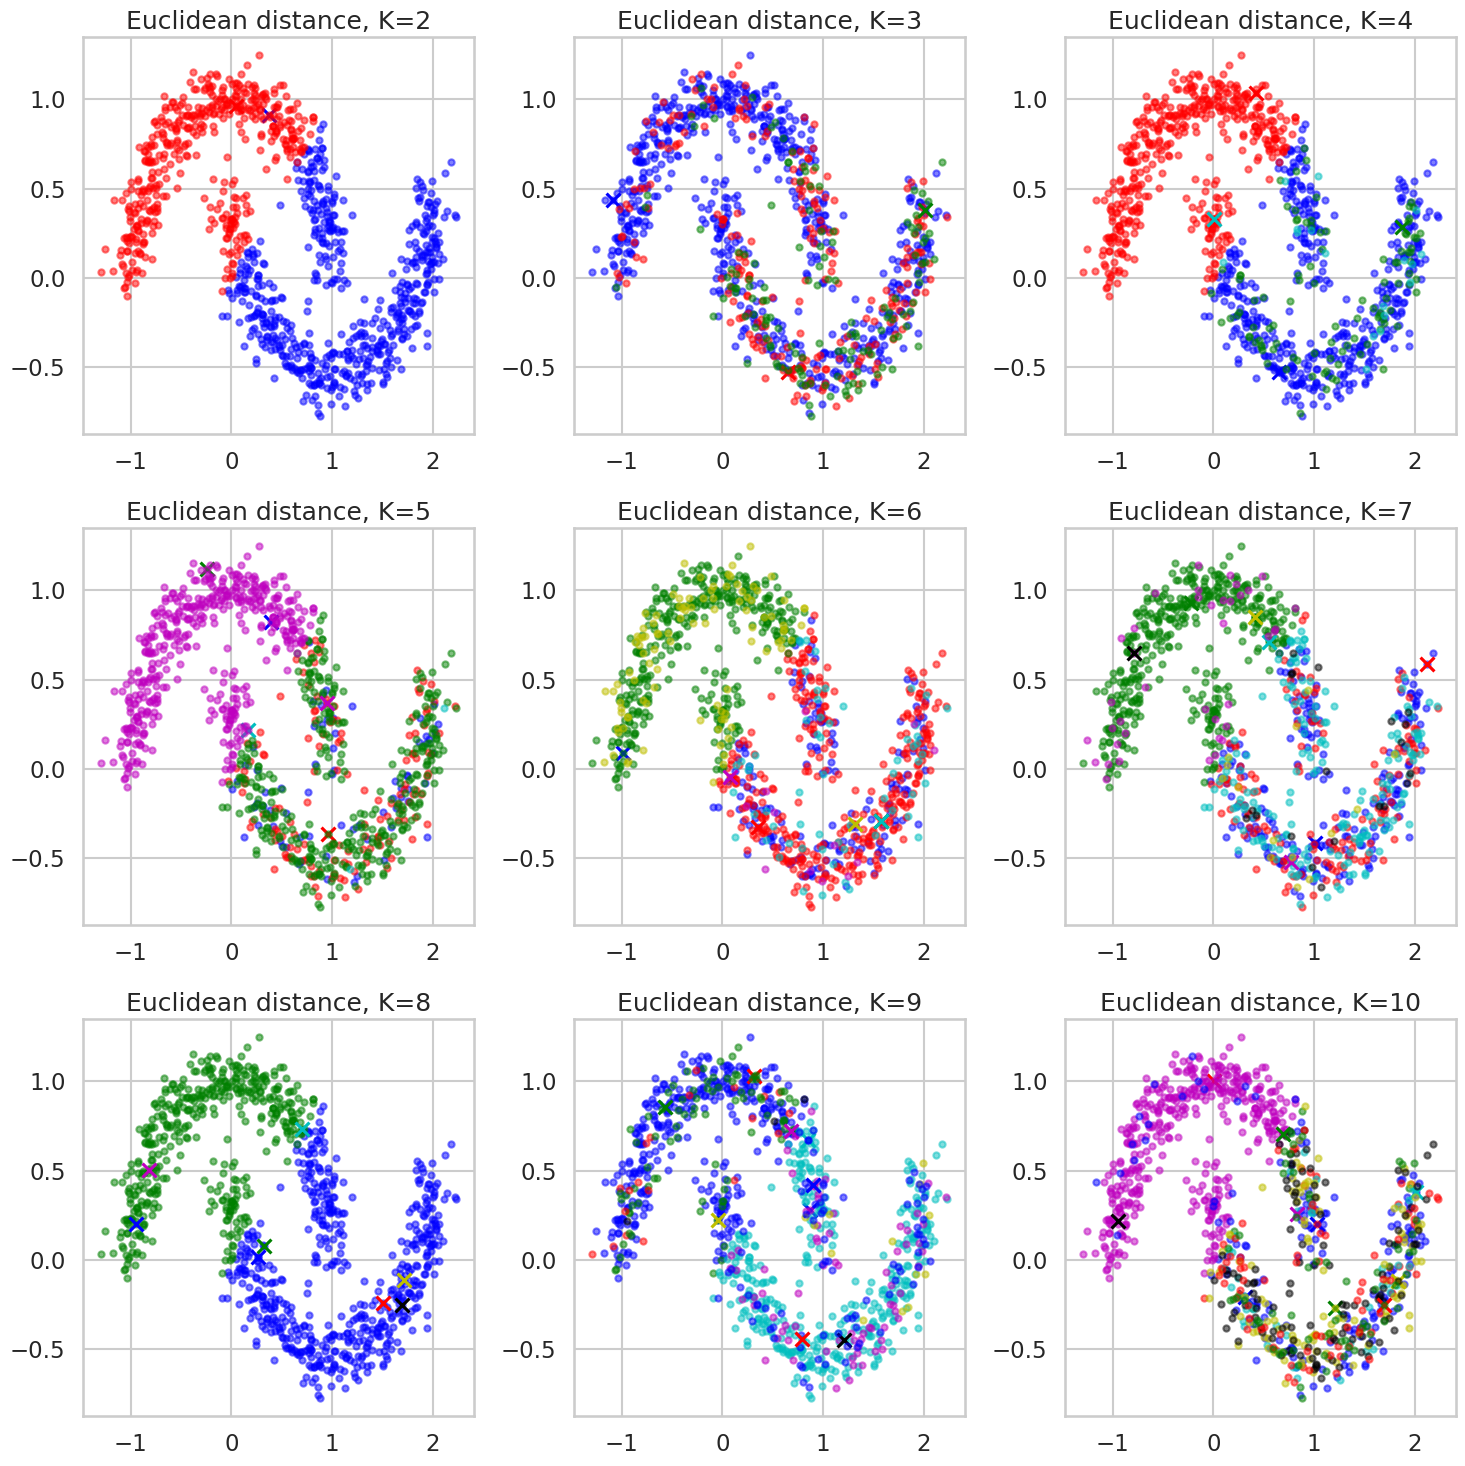

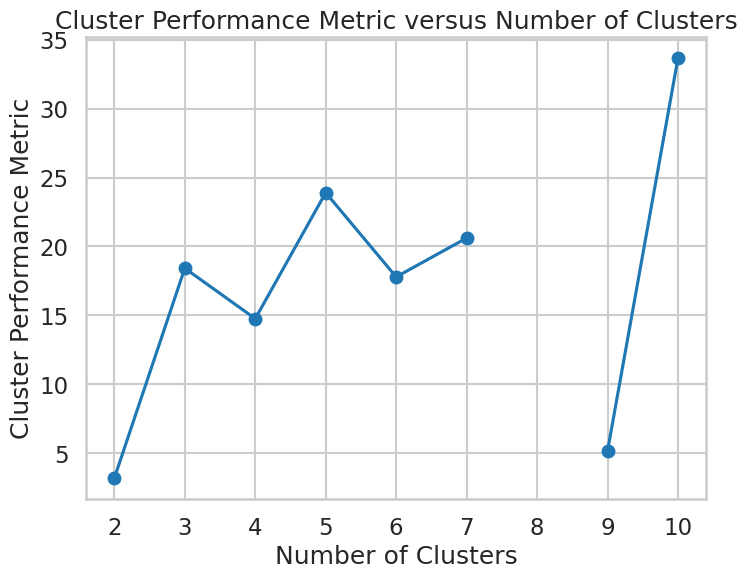

In [ ]:
cluster_range = range(2, 11)
#max = 300
# Initialize lists to store cluster performance metrics
cluster_metrics = []


# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, 'Pearson')

    # Display clusters
    axes[row, col].set_title(f'Euclidean distance, K={num_clusters}')
    display_cluster(X, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                           'cluster_centers_': X[np.random.choice(X.shape[0], num_clusters)]},
                    num_clusters=num_clusters, ax=axes[row, col])
    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps

### Dataset:

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Customer data.csv to Customer data.csv


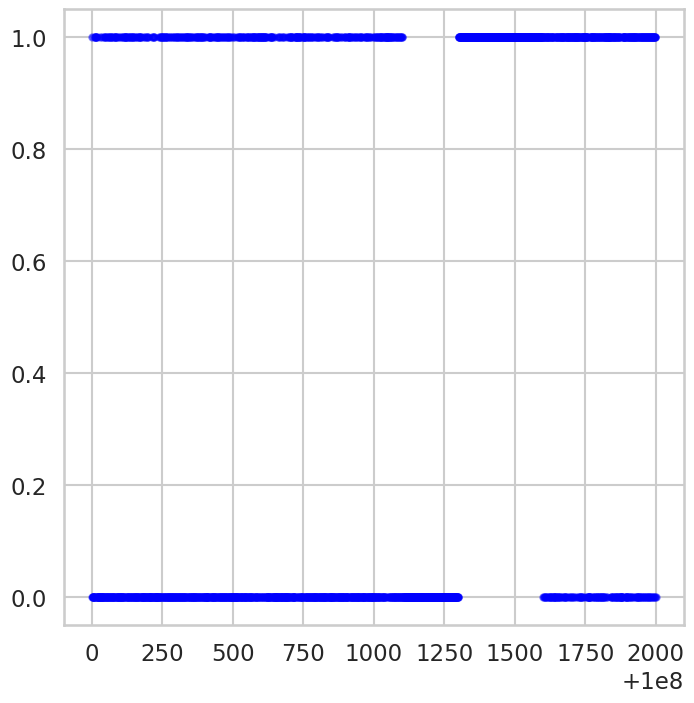

In [ ]:
customerdata = 'Customer data.csv'
df = pd.read_csv(customerdata)
features = df.columns
customer_data = df[features].values
display_cluster(customer_data)

### Eculidean:

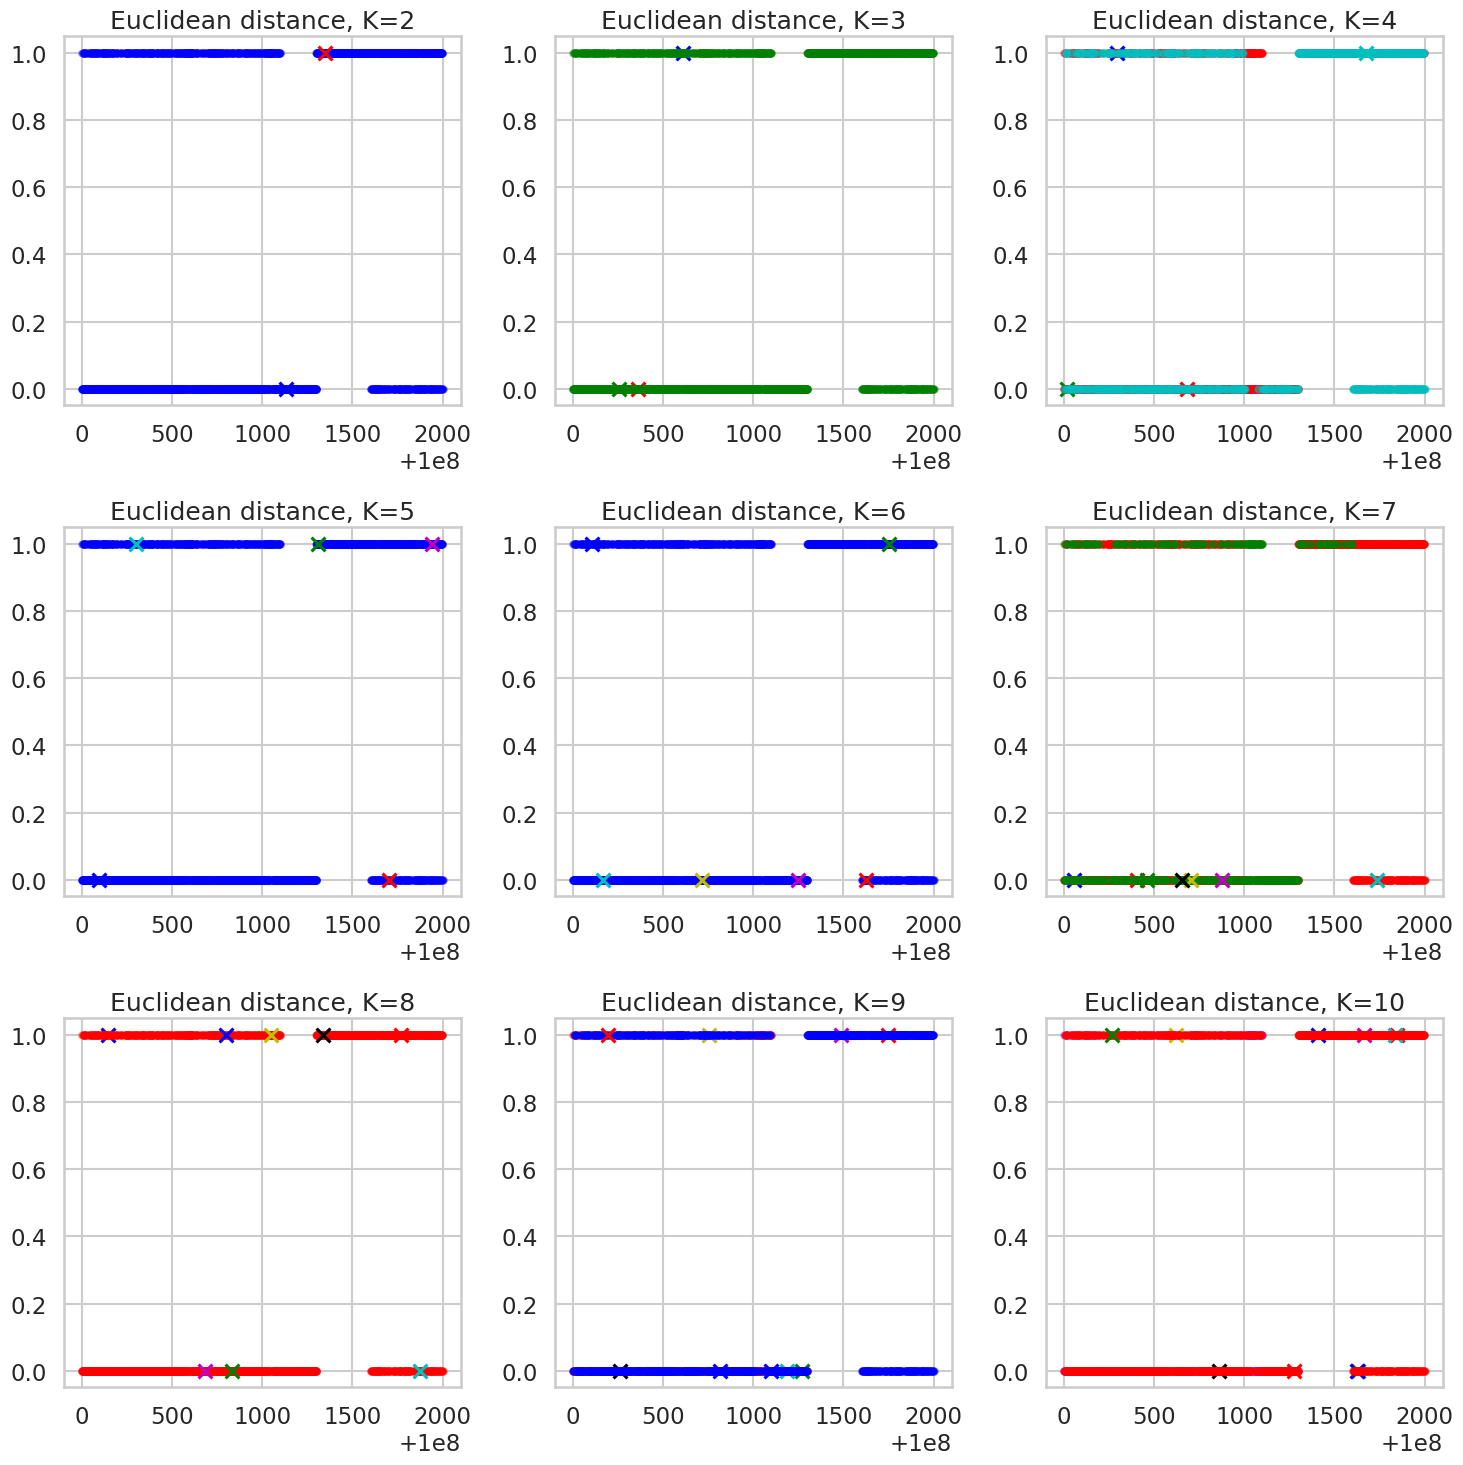

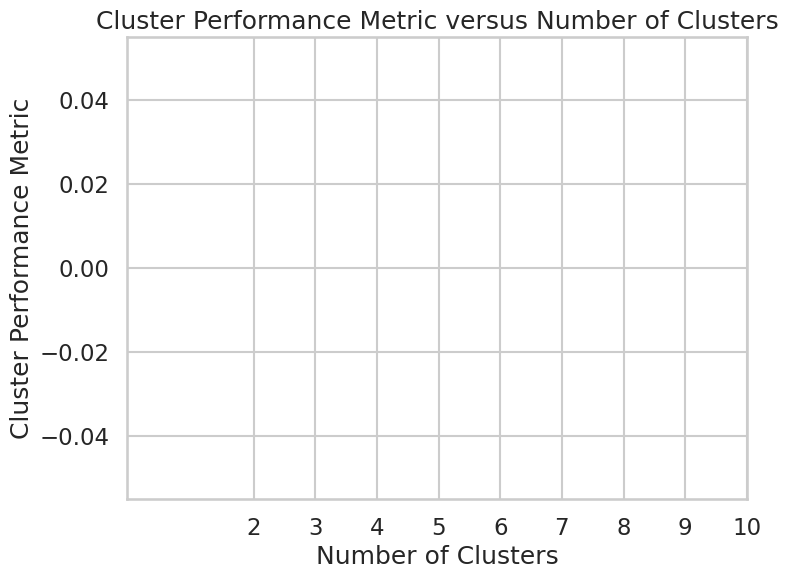

In [ ]:
cluster_range = range(2, 11)
#max = 2000
# Initialize lists to store cluster performance metrics
cluster_metrics = []

# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(customer_data, num_clusters, 'Euclidean')
    # Display clusters
    cluster_centers_indices = np.random.choice(customer_data.shape[0], num_clusters, replace=False)
    cluster_centers = customer_data[cluster_centers_indices]
    axes[row, col].set_title(f'Euclidean distance, K={num_clusters}')
    display_cluster(customer_data, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                                       'cluster_centers_': cluster_centers},
                     num_clusters=num_clusters, ax=axes[row, col])

    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [ ]:
print(cluster_metrics)

[nan, nan, nan, nan, nan, nan, nan, nan, nan]


### Pearson:

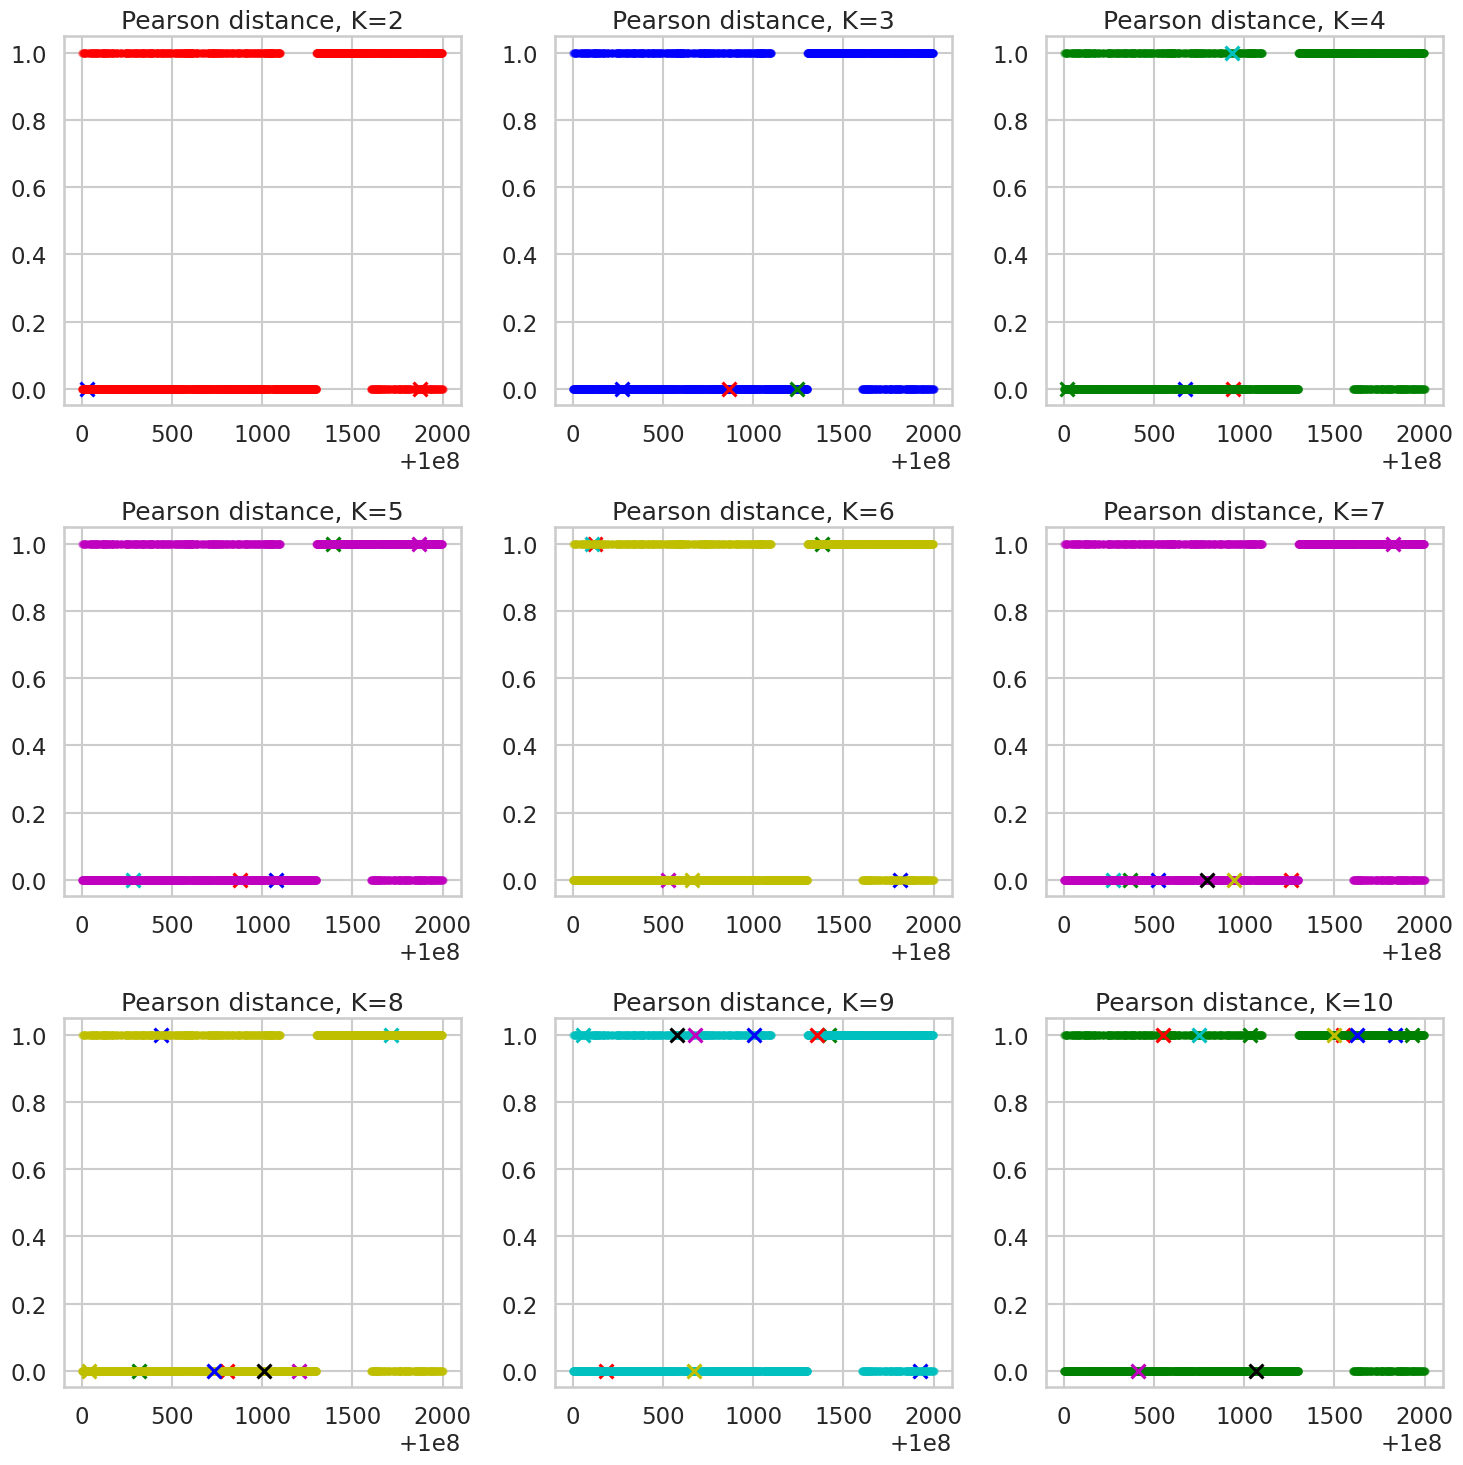

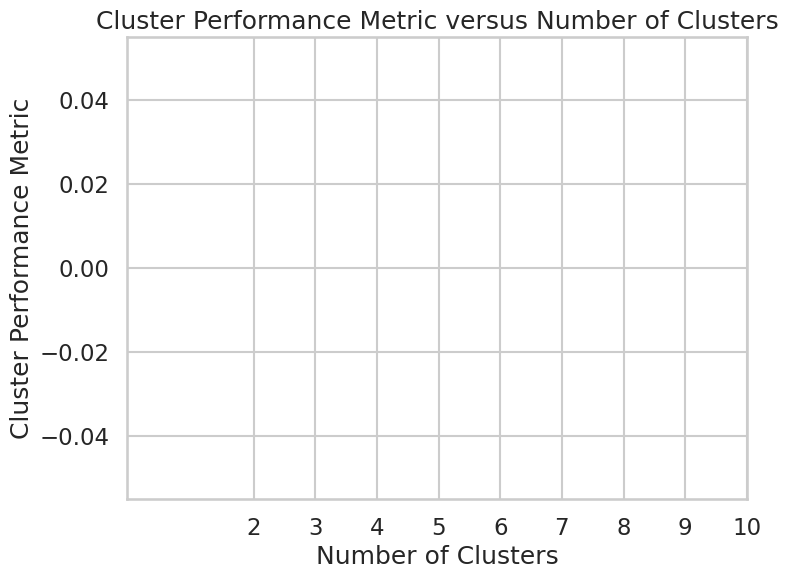

In [ ]:
cluster_range = range(2, 11)
#max = 300
# Initialize lists to store cluster performance metrics
cluster_metrics = []

# Create subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over different numbers of clusters
for i, num_clusters in enumerate(cluster_range):
    row = i // num_cols
    col = i % num_cols

    # Apply KMeans clustering using GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(customer_data, num_clusters, 'Pearson')
    # Display clusters
    cluster_centers_indices = np.random.choice(customer_data.shape[0], num_clusters, replace=False)
    cluster_centers = customer_data[cluster_centers_indices]
    axes[row, col].set_title(f'Pearson distance, K={num_clusters}')
    display_cluster(customer_data, km={'labels_': np.argmin(Final_Cluster_Distance, axis=1),
                                       'cluster_centers_': cluster_centers},
                     num_clusters=num_clusters, ax=axes[row, col])
    cluster_metrics.append(Cluster_Metric)

plt.tight_layout()
plt.show()

# Plot cluster performance metric versus number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.title('Cluster Performance Metric versus Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [ ]:
print(cluster_metrics)

[nan, nan, nan, nan, nan, nan, nan, nan, nan]
